# HW 7/8
__CS 216, Everything Data, Spring 2020__

__DUE: Monday March 30 by 4:40 pm (class time)__

In this assignment, you will experience using a professional grade open source library (Pytorch) for deep learning with convolutional neural networks. You will include all of your answers for this assignment within this notebook. You will then convert your notebook to a .pdf and a .py file to submit to gradescope (submission instructions are included at the bottom).

Please take note of the [course collaboration policy](https://sites.duke.edu/compsci216s2020/policies/). You may work alone or with a single partner. If you work with a partner, you may not split up the assignment; you should work together or complete parts independently and come together to discuss your solutions. In either case, you are individually responsible for your work, and should understand everything in your submission.

# Part 1: Getting Started with Pytorch
Pytorch is one of two dominant open source libraries for deep learning (the other being Tensorflow). Unlike most of the Python for data science libraries we have used so far this semester (Pandas, Numpy, Scikit-Learn, etc.), Pytorch is not included in the Anaconda distribution of Python. To get started, you will need to install Pytorch. Visit https://pytorch.org/get-started/locally/ and follow the instructions to download and install Pytorch.

You should select the `Stable (1.4)` build of Pytorch. Next, select the operating system for your computer. Use the package `Conda`, assuming that you downloaded and have been using the Anaconda distribution of Python for data science reccomended for this course. It is also possible to install using pip (or even building from the source code), but we reccomend using Anaconda. Select the language `Python`. CUDA is a NVIDIA toolkit for using NVIDIA GPUs to accelarate parallel programming; *you do not need to use CUDA for this course*. If you do not want to deal with CUDA, or if your computer does not have a compatible graphics card then you should simply select `None` for the CUDA row in the Pytorch installation guide.

Once you have selected the appropriate options, the webpage will provide the command you should run, along with other details. For quick tips for specific operating systems:
- On a mac or linux machine, you should simply need to open your terminal and write the given command. For example, on a mac, installing without CUDA, you should simply need to open your terminal, write `conda install pytorch torchvision -c pytorch` and press enter. The library should begin downloading and installing; it may ask you for permission to proceed by writing `y` in your terminal and pressing enter.
- On a windows machine, you will need to open your Anaconda prompt. To do so, simply click the search bar or windows start button and type `Anaconda Prompt`, you should see the app (note that you want the prompt, not the anaconda navigator). Then, simply enter the install command in the prompt. For example, if you are installing without CUDA, you should just need to write `conda install pytorch torchvision cpuonly -c pytorch` and press enter. The library should begin downloading and installing; it may ask you for permission to proceed by writing `y` in your terminal and pressing enter.

Once you have downloaded and installed Pytorch, you should check to make sure everything is working correctly. Try running the following code cell to verify. You should see the following printed:

    tensor([[0.4963, 0.7682, 0.0885],
            [0.1320, 0.3074, 0.6341],
            [0.4901, 0.8964, 0.4556]])

In [1]:
import torch
torch.manual_seed(0)
x = torch.rand(3, 3)
print(x)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556]])


## Part 2: Pytorch Deep Learning Tutorial
Once you have Pytorch installed and working correctly, you should familiarize yourself with the the basics of the package, especially the fundamental tensor data structure (similar to multi-dimensional Numpy arrays), the autograd package for automatic differentiation (which implements backpropagation for you), and how to define and train a neural network.

Visit https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html and complete the 60 minute blitz. Start by watching the 2 minute embedded youtube video introducing the tutorial, then go through the four modules (What is Pytorch, Autograd: Automatic Differentiation, Neural Networks, and Training a Classifier) that make up the tutorial. All of the modules have practical code examples; we *highly recommend* that you run the code yourself as you go through the examples. You can do so in this notebook if you wish, or you can download the Jupyter notebooks provided at the top of the page for every module. You can even run the examples in Google Colab (a web platform for executing code) via the link at the top left of the module pages. We recommend that you pay special attention to the "Training a classifier" module, which is a very useful practical code example of defining and training a neural network that we discussed in class. 

Understanding the concepts from class and carefully going through this tutorial should prepare you for the next part of the assignment. However, there are a number of additional examples and tutorials linked at the end of the above blitz (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#where-do-i-go-next). While you are not required to do so, you should feel free to refer to these additional resources as needed. Additionally, you can find the full Pytorch documentation here: https://pytorch.org/docs/stable.

## Part 3: Convolutional Neural Networks
Answer the following based on the code in the file [cifar10_tutorial.py](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py) from the tutorial mentioned above in Part 2 (all code here is adapted from that tutorial). You will need to modify and run parts of the code to answer the questions.

If you have not already done so in this notebook, you can import the necessary Pytorch libraries, download/import the CIFAR-10 image dataset, and view some of the images from the dataset by running the below code blocks. Note that the CIFAR-10 image dataset is around 163 MB and may take some time to download.

In [2]:
# Imports all of the necessary Pytorch libraries

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# Downloads, imports, and formats the necessary data for this homework 
# from the CIFAR-10 image dataset. 

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


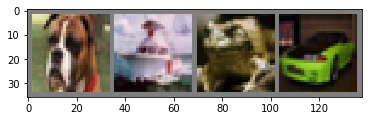

  dog  ship  frog   car


In [4]:
# Displays images from the CIFAR-10 image dataset

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

Note in particular that the examples come in "mini-batches" of four examples / four images each. So each "input" to the nerual network below is actually a tensor of 4 32x32 images, each with 3 color channels.

### Problem A
The following code defines the architecture of the convolutional neural network used in the tutorial. Make sure to run the code for use in later problems. Then, in your own words, specify the architecture by describing the kinds of layers used, their dimensions, and in what sequence they appear. Some tips:
- Note that the init method for the class defines the types of layers, but the forward method actually defines how they appear in the network by defining forward propagation from left to right through the network.
- Think about about the dimensions of the inputs change during a convolutional layer or a pooling layer.
- It might be helpful to look at the Pytorch documentation to see what the parameters to the functions are.
- If you aren't sure about how the dimensions are changing, try adding some print statements in the forward method that show you the dimensions after each operation (for example, you can print x.shape to see a tuple of dimensions; it's up to you to interpret those). Then you can try calling the net on a particular input to see what happens at each layer. Do **not** leave these print statements in once you move on training in subsequent parts of the assignment, or you will print thousands of lines and your homework will become hundreds of pages.
- You can also break down the operations if you want by applying the convolution first, then the relu, then the pooling, etc. on separate lines if you wish. 


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

print("Network architecture specified.")

Network architecture specified.


The input has dimmensions 32x32x3.  
The dimmensions of the output of the first convolution layer are 28x28x6.  
That output is then put through a rectified linear unit function.  
The next layer is a pooling layer, the dimmensions of the output of which are 14x14x6.  
The next layer is a second convolution layer, the dimmensions of the output of which are 10x10x16.  
That output is put through a rectified linear unit function.  
The next layer is a second pooling layer, the dimmensions of the output of which are 5x5x16.  
The next layer is a flattening layer, the dimmensions of the output are 1x400.  
The next few layers compose a multilayer perceptron with recitified linear unit functions in between each layer.
The dimmensions of these layers' outputs are 1x120, 1x84, 1x10.  
1x10 is the dimmension of the output. It is 1x10 because there are 10 possible kinds of images.

### Problem B
Try running the code to initialize and train the neural network (taken from the tutorial; copied below) twice. Note that you won't get the same training loss values each time. Explain why. Note that this training is computationally intensive, it will take a few seconds for the code to run. A "Finished Training" message should print when complete (you can also see whether code is still executing in a Jupyter notebook more generally by viewing the circle in the top right of the UI: it is a white/clear circle when the kernel is idle, but it is filled-in/gray when the kernel is executing code.

In [6]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(1):  # Just 1 epoch to make the code run faster

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.214
[1,  4000] loss: 1.866
[1,  6000] loss: 1.660
[1,  8000] loss: 1.597
[1, 10000] loss: 1.504
[1, 12000] loss: 1.489
Finished Training


The loss values are different for each run through because the neural networks' starting weights are random so each run through starts with different initial weights.

### Problem C
How do you think the train error and test error change when the momentum of the SGD optimizer is lowered? Try initializing and training the model twice; first with a momentum of 0.9 (used in the tutorial) and then with a momentum of 0.5. For each, report the training loss after every 2000 mini-batches (those are the training losses printed by the code) for a single epoch of training, as well as the test accuracy of the resulting model after training. Note that (as you observed in problem B), the training error can vary for different runs even with the same parameters. To make the comparison fair, we will set the state of the Pytorch optimizer. As in problem B, note that the code for training a model will take a few seconds to run.

The only thing you should need to chnage in the below code is the value of the momentum parameter.

In [7]:
torch.manual_seed(0)
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.50)

In [8]:
for epoch in range(1):  # just 1 epoch to make the code run faster

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.297
[1,  6000] loss: 2.259
[1,  8000] loss: 2.063
[1, 10000] loss: 1.954
[1, 12000] loss: 1.880
Finished Training


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 34 %


Training loss when momentum = 0.9:

    [1,  2000] loss: 2.212
    [1,  4000] loss: 1.877
    [1,  6000] loss: 1.692
    [1,  8000] loss: 1.594
    [1, 10000] loss: 1.539
    [1, 12000] loss: 1.513

Accuracy of the network on the 10000 test images when momentum = 0.9: 49 %

Training loss when momentum = 0.5:

    [1,  2000] loss: 2.303
    [1,  4000] loss: 2.297
    [1,  6000] loss: 2.259
    [1,  8000] loss: 2.063
    [1, 10000] loss: 1.954
    [1, 12000] loss: 1.880

Accuracy of the network on the 10000 test images when momentum = 0.5: 34 %

The training loss is generally greater and the accuracy is lower when momentum is changed to 0.5.  This is likely because, with a momentum of 0.5, noise becomes an issue.

### Problem D 
In the tutorial from part 2, the author got a training error of 1.294 after 2 epochs of training (note that you might get a different training error running their same code due to the randomness as discussed earlier). Try to modify the architecture of the CNN to achieve better (smaller than 1.294) training loss after 2 epochs of training. Report (in words) the final architecture you used and the test accuracy of the model. As in problem C, we will set the state of the Pytorch optimizer so that training multiple times with the same architecture will result in the same training loss; you may not change the seed. As with previous problems, note that the code to train a model will take a few seconds to run.

In [10]:
# Here you can define the architecture of yor new
# and improved neural network (BetterNet) however
# you wish. Note that the initialization defines the 
# types of layers; the actual order of operations in the
# network is defined in the forward method. We have
# started by copying the tutorial specifications; you
# will need to edit these hyperparameters to define
# your new network.

class BetterNet(nn.Module):
    def __init__(self):
        super(BetterNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
# Here we set the seed and initialize your new
# neural network. You just need to run this
# code; you should not need to edit it.

torch.manual_seed(0)
better_net = BetterNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(better_net.parameters(), lr=0.001, momentum=0.90)

In [12]:
# Training is conducted here. You should just
# need to run this code for a given network 
# architecture; you should not need to edit it.

for epoch in range(2):  # 2 epochs of training

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = better_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.188
[1,  4000] loss: 1.835
[1,  6000] loss: 1.655
[1,  8000] loss: 1.540
[1, 10000] loss: 1.489
[1, 12000] loss: 1.415
[2,  2000] loss: 1.341
[2,  4000] loss: 1.306
[2,  6000] loss: 1.244
[2,  8000] loss: 1.242
[2, 10000] loss: 1.199
[2, 12000] loss: 1.166
Finished Training


In [13]:
# Testing is conducted here. You should
# just need to run this code once you 
# have finished training; you should not
# need to edit it.

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = better_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


I was able to get a final training error of 1.166 and an accuracy of 59%.  I changed the number of channels output by the two convolutional layers to do this.  I changed the first one from 6 to 12 and the second one from 16 to 32.

## Submitting HW 7-8
1. Double check that you have written all of your answers along with your supporting work in this notebook. Make sure you save the complete notebook.
1. Double check that your entire notebook runs correctly and generates the expected output. To do so, you can simply select Kernel -> Restart and Run All. 
2. You will download two versions of your notebook to submit, a .pdf and a .py. To create a PDF, we reccomend that you select File --> Download as --> HTML (.html). Open the downloaded .html file; it should open in your web broser. Double check that it looks like your notebook, then print a .pdf using your web browser (you should be able to select to print to a pdf on most major web browsers and operating systems). Check your .pdf for readability: If some long cells are being cut off, go back to your notebook and split them into multiple smaller cells. To get the .py file from your notebook, simply select File -> Download as -> Python (.py) (note, we recognize that you may not have written any Python code for this assignment, but will continue the usual workflow for consistency). 
3. Upload the .pdf to gradescope under hw 7-8 report and the .py to gradescope under hw 7-8 code. If you work with a partner, only submit one document for both of you, but be sure to add your partner using the [group feature on gradescope](https://www.gradescope.com/help#help-center-item-student-group-members).